Course: INF2178

Assignment: Assignment 1

Student name: Ruiying Wang

Student Number: 1003059762

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [147]:
#Read datafile
file = pd.read_excel('INF2178_A1_data.xlsx')
file.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


Data Cleaning and Preparation

In [148]:
#Drop unused column
file = file.drop(['ORGANIZATION_NAME','PROGRAM_ID','PROGRAM_NAME','OVERNIGHT_SERVICE_TYPE','PROGRAM_AREA'],axis=1)
file['CAPACITY_TYPE'] = file['CAPACITY_TYPE'].str.replace(' Capacity', '')

#Add new column to display capacity and occupied (use bed value if capacity type is bed based capacity, otherwise, use room value)
file['Capacity']=file.apply(lambda x:x['CAPACITY_ACTUAL_BED'] if x['CAPACITY_TYPE']=="Bed Based" else x['CAPACITY_ACTUAL_ROOM'],axis=1)
file['Occupied']=file.apply(lambda x:x['OCCUPIED_BEDS'] if x['CAPACITY_TYPE']=="Bed Based" else x['OCCUPIED_ROOMS'],axis=1)

#Calculate occupancy rate
file['Occupancy_rate']=file['Occupied']/file['Capacity']

In [149]:
# Check for missing values
missing_value = file.isnull().sum()

missing_value

OCCUPANCY_DATE              0
SECTOR                      0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_TYPE               0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
Capacity                    0
Occupied                    0
Occupancy_rate              0
dtype: int64

In [150]:
#create new file that drop row that program model is null.
file_program = file.dropna(subset=['PROGRAM_MODEL'])

In [151]:
#Prepare occupancy rate by capacity type
room_occupancy = file[file['CAPACITY_TYPE']=='Bed Based']['Occupancy_rate']
bed_occupancy = file[file['CAPACITY_TYPE']=='Room Based']['Occupancy_rate']

#Prepare occupancy rate by Program type
emergency_occupancy = file_program[file_program['PROGRAM_MODEL']=='Emergency']['Occupancy_rate']
transitional_occupancy = file_program[file_program['PROGRAM_MODEL']=='Transitional']['Occupancy_rate']

In [152]:
def summary_statistics(data):
    mean = np.round(np.mean(data), 2)
    median = np.round(np.median(data), 2)
    min_value = np.round(data.min(), 2)
    max_value = np.round(data.max(), 2)
    quartile_1 = np.round(data.quantile(0.25), 2)
    quartile_3 = np.round(data.quantile(0.75), 2)
    stdev = np.round(np.std(data), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('Stdev: %s' % stdev)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('IQR: %s' % iqr)

In [153]:
print('Overall Summary statistics')
stat_summary=file[['SERVICE_USER_COUNT', 'Capacity', 'Occupied', 'Occupancy_rate']].describe()
print(stat_summary)

print('\nSummary statistics for Room Occupancy Rate')
summary_statistics(room_occupancy)

print('\nSummary statistics for Bed Occupancy Rate')
summary_statistics(bed_occupancy)

print('\nSummary statistics for Emergency Program Occupancy Rate')
summary_statistics(emergency_occupancy)

print('\nSummary statistics for Transitional Program Occupancy Rate')
summary_statistics(transitional_occupancy)

Overall Summary statistics
       SERVICE_USER_COUNT      Capacity      Occupied  Occupancy_rate
count        50944.000000  50944.000000  50944.000000    50944.000000
mean            45.727171     40.335447     38.159567        0.930142
std             53.326049     43.439493     42.702181        0.138788
min              1.000000      1.000000      1.000000        0.012048
25%             15.000000     16.000000     14.000000        0.923077
50%             28.000000     27.000000     25.000000        1.000000
75%             51.000000     49.000000     47.000000        1.000000
max            339.000000    268.000000    268.000000        1.014085

Summary statistics for Room Occupancy Rate
Min: 0.02
Mean: 0.93
Max: 1.0
Stdev: 0.12
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
IQR: 0.1

Summary statistics for Bed Occupancy Rate
Min: 0.01
Mean: 0.93
Max: 1.01
Stdev: 0.16
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
IQR: 0.04

Summary statistics for Emergency Program O

Text(0.5, 1.0, '# of Service Users over Time by Sector')

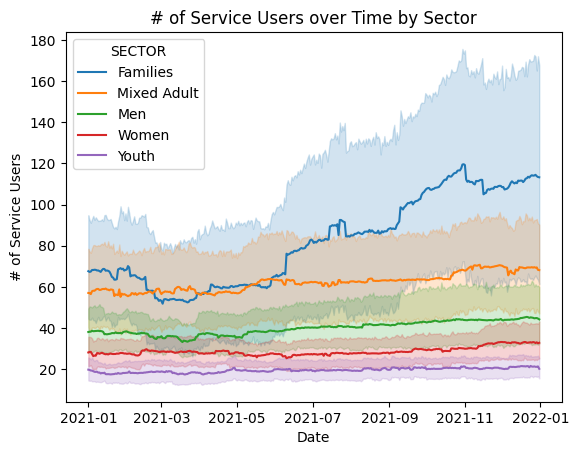

In [154]:
#Create line chart to display number of service users over time by Sectory
sns.lineplot(x="OCCUPANCY_DATE",y="SERVICE_USER_COUNT",hue="SECTOR",data=file)
plt.xlabel("Date")
plt.ylabel("# of Service Users")
plt.title("# of Service Users over Time by Sector")

Text(0.5, 1.0, '# of Service Users over Time')

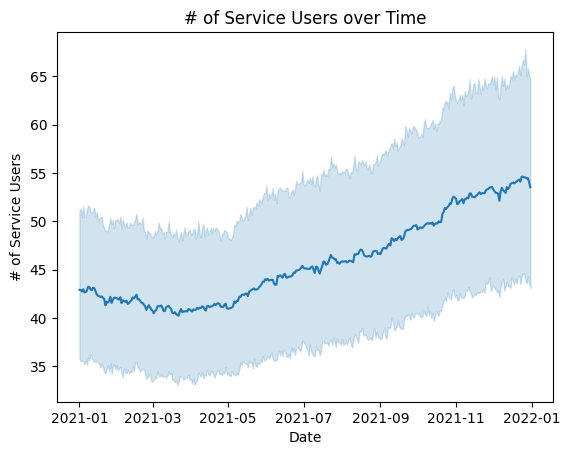

In [155]:
#Create line chart to display number of service users over time
sns.lineplot(x="OCCUPANCY_DATE",y="SERVICE_USER_COUNT",data=file)
plt.xlabel("Date")
plt.ylabel("# of Service Users")
plt.title("# of Service Users over Time")

Text(0.5, 1.0, '# of Service Users over Time by Capacity type')

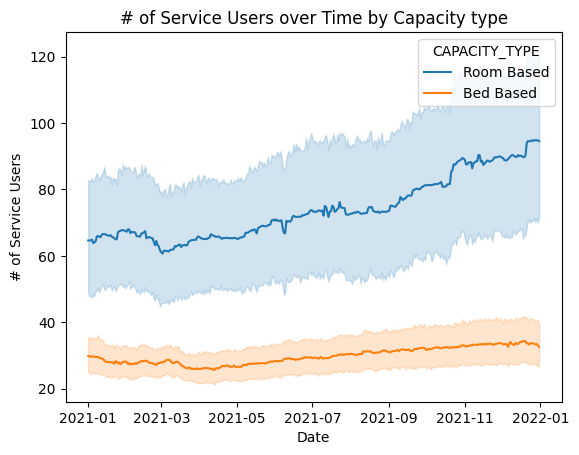

In [156]:
#Create line chart to display number of service users over time by Capacity type
sns.lineplot(x="OCCUPANCY_DATE",y="SERVICE_USER_COUNT",hue="CAPACITY_TYPE",data=file)
plt.xlabel("Date")
plt.ylabel("# of Service Users")
plt.title("# of Service Users over Time by Capacity type")

#Conclusion: Increasing demand of shelfter of room type. 

Text(0.5, 1.0, '# of Service Users over Time by Program Model')

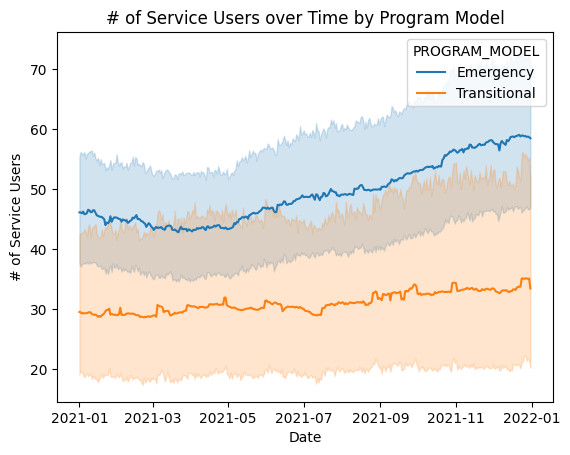

In [157]:
#Create line chart to display number of service users over time by program type
sns.lineplot(x="OCCUPANCY_DATE",y="SERVICE_USER_COUNT",hue="PROGRAM_MODEL",data=file_program)
plt.xlabel("Date")
plt.ylabel("# of Service Users")
plt.title("# of Service Users over Time by Program Model")

#Conclusion: Increasing demand of shelfter of emergency program over time. 

Text(0.5, 1.0, 'Occupancy rate over Time')

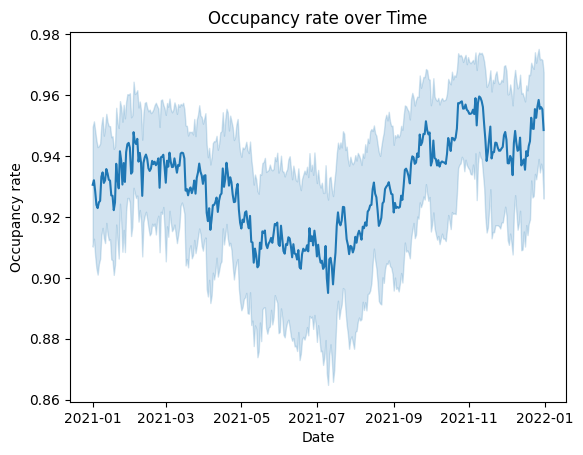

In [158]:
#Create line chart to display occupancy rate over time
sns.lineplot(x="OCCUPANCY_DATE",y="Occupancy_rate",data=file)
plt.xlabel("Date")
plt.ylabel("Occupancy rate")
plt.title("Occupancy rate over Time")


Text(0.5, 1.0, 'Occupancy rate over Time by Capacity type')

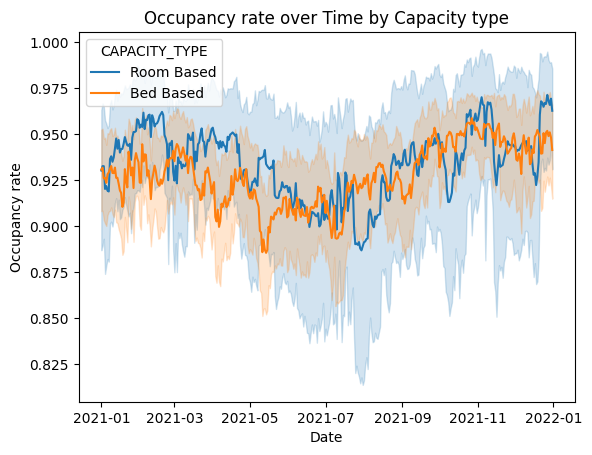

In [159]:
#Create line chart to display occupancy rate over time by capacity type
sns.lineplot(x="OCCUPANCY_DATE",y="Occupancy_rate",hue='CAPACITY_TYPE',data=file)
plt.xlabel("Date")
plt.ylabel("Occupancy rate")
plt.title("Occupancy rate over Time by Capacity type")

Text(0.5, 1.0, 'Occupancy rate over Time by Program Model')

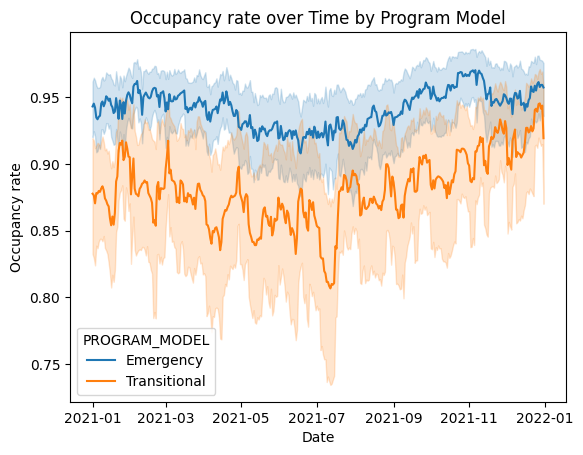

In [160]:
#Create line chart to display occupancy rate over time by program model
sns.lineplot(x="OCCUPANCY_DATE",y="Occupancy_rate",hue='PROGRAM_MODEL',data=file_program)
plt.xlabel("Date")
plt.ylabel("Occupancy rate")
plt.title("Occupancy rate over Time by Program Model")

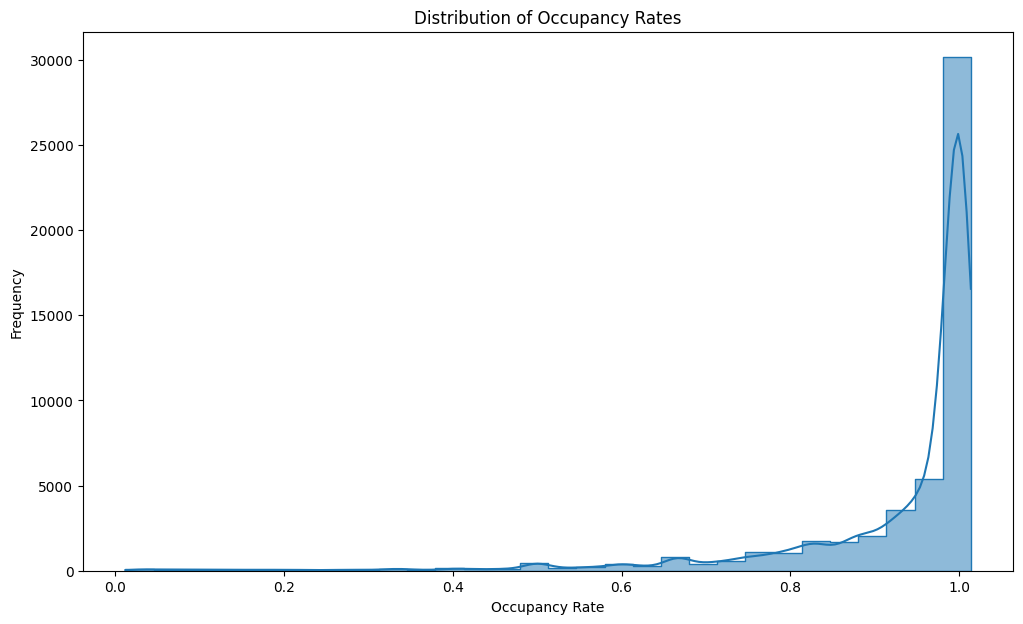

In [161]:
# Distribution of Occupancy Rates by Capacity type
plt.figure(figsize=(12, 7))
sns.histplot(data=file, x='Occupancy_rate', bins=30, kde=True, element='step')
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

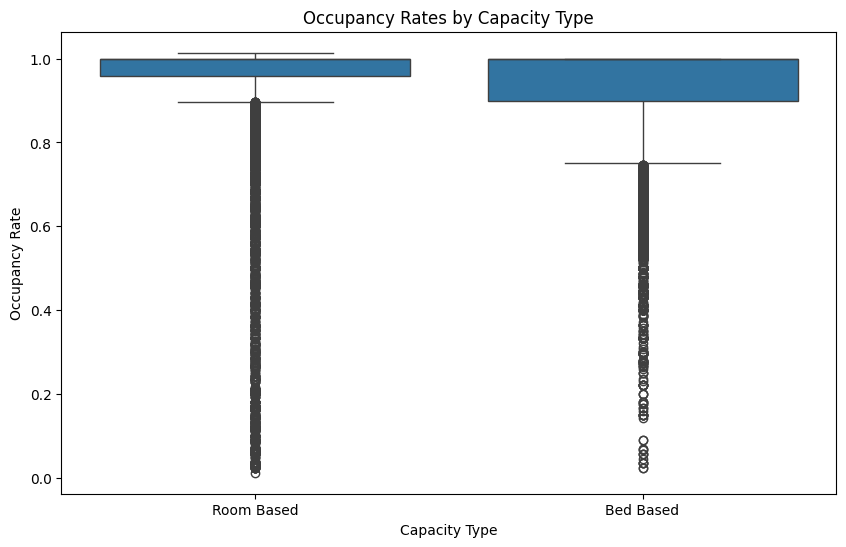

In [162]:
# Occupancy Rates by Capacity Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAPACITY_TYPE', y='Occupancy_rate', data=file)
plt.title('Occupancy Rates by Capacity Type')
plt.xlabel('Capacity Type')
plt.ylabel('Occupancy Rate')
plt.show()

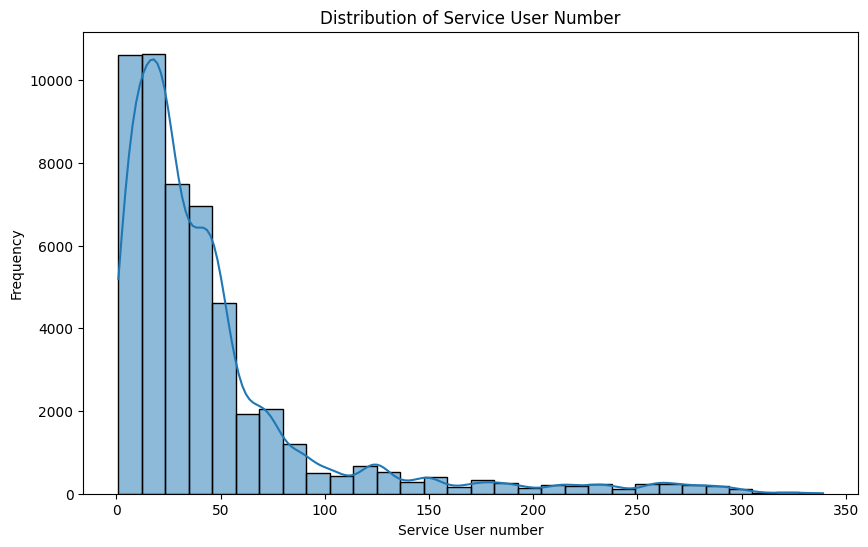

In [163]:
#Distribution of Service User Number 
plt.figure(figsize=(10, 6))
sns.histplot(file['SERVICE_USER_COUNT'], bins=30, kde=True)
plt.title('Distribution of Service User Number')
plt.xlabel('Service User number')
plt.ylabel('Frequency')
plt.show()

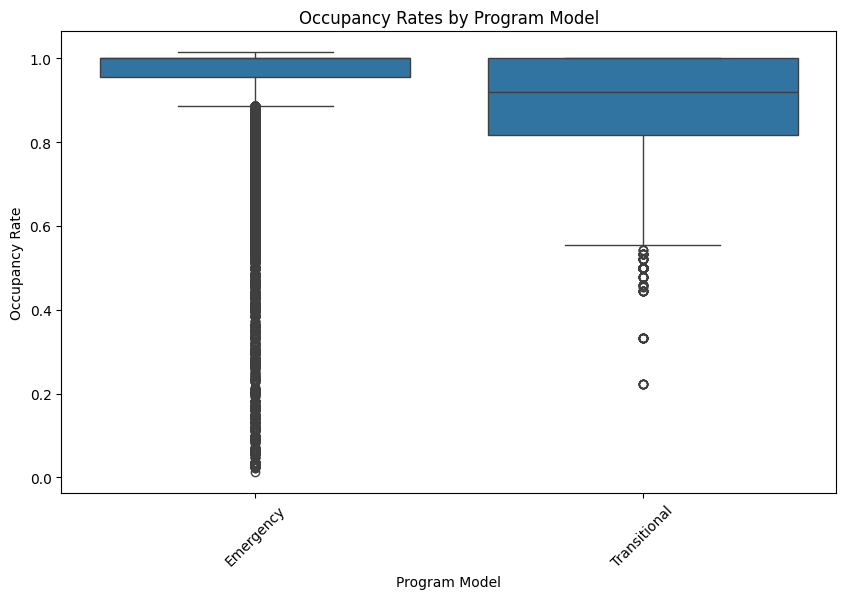

In [164]:
#Occupancy Rates by Program Model
plt.figure(figsize=(10, 6))
sns.boxplot(x='PROGRAM_MODEL', y='Occupancy_rate', data=file_program)
plt.xticks(rotation=45)
plt.title('Occupancy Rates by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate')
plt.show()

T-test

In [165]:
#Welch's t-test: Mean Occupancy rate of Room capacity Type and Bed capacity Type
#H0: There is no difference in mean occupancy rates between Room capacity Type and Bed capacity Type.
#H1: There is a difference in mean occupancy rates between Room capacity Type and Bed capacity Type.

t_stat, p_val = stats.ttest_ind(room_occupancy, bed_occupancy, equal_var = False)
print('T-test: Mean Occupancy rate of Room capacity Type and Bed capacity Type\n')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

T-test: Mean Occupancy rate of Room capacity Type and Bed capacity Type

t-statistic = -4.498751771925636
p-value = 6.860477551487939e-06


In [166]:
#Welch's t-test: Mean Occupancy rate of Program type: Emergency and Transitional
#H0: There is no difference in mean occupancy rates between Emergency program and Transitional program.
#H1: There is a difference in mean occupancy rates between Emergency program and Transitional program.

t_stat, p_val = stats.ttest_ind(emergency_occupancy, transitional_occupancy, equal_var = False)
print('T-test: Mean Occupancy rate of Program type: Emergency and Transitional\n')
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

T-test: Mean Occupancy rate of Program type: Emergency and Transitional

t-statistic = 40.981115372199206
p-value = 0.0
